In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data being loaded into train_data and test_data

In [3]:
#first we read our data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Going through the steps of Exploratory Data Analysis

In [4]:
#Second we have to understand our data through EDA(Exploratory
#Data Analysis)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
#Third we clean the data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
pd.DataFrame(train_data.dtypes)

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In the cells above I was making sure I understood the data and make a few hypothesis. First we can see our features and I predict that Pclass and Sex will
impact the result greatly. Usually men save women in dangerous situations and the wealthy always get priority in benefits.

<AxesSubplot:>

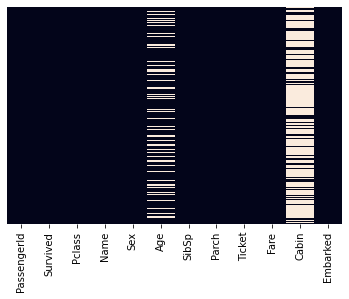

In [11]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [14]:
#This is a great map to visualize how much data we are missing even though we did it above on the cell that states isnull.sum

In [16]:

#drop missing values and values I think are useless for our models
columns_to_drop = ["Age", "Cabin", "Ticket", "Name", "Parch", "Embarked"]
train_data = train_data.drop(columns=columns_to_drop)

test_data = test_data.drop(columns=columns_to_drop)

KeyError: "['Age' 'Cabin' 'Ticket' 'Name' 'Parch' 'Embarked'] not found in axis"

<AxesSubplot:xlabel='Survived', ylabel='count'>

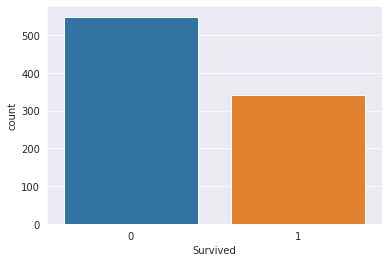

In [17]:
# fourth we moved to visual analysis
sns.set_style("darkgrid")
sns.countplot(x = "Survived", data = train_data)

In [18]:
#Most of the population seems to have died than survived, truly a tragedy

<AxesSubplot:xlabel='Survived', ylabel='count'>

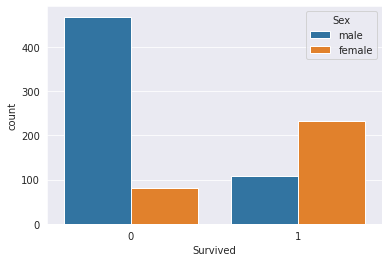

In [19]:
sns.countplot(x = "Survived", hue = "Sex", data = train_data)

In [ ]:
#Seems my prediction of guys being gentlemans is correct as we can see that the
#ratio of women surviving is positive as for the men it is negative by a lot

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

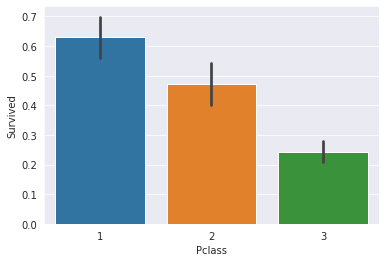

In [20]:
sns.barplot(y = "Survived", x = "Pclass", data = train_data)

In [22]:
#What a cruel world of money we live in as we can see that the higher class you are the
#higher chances of your survival what a shocker

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

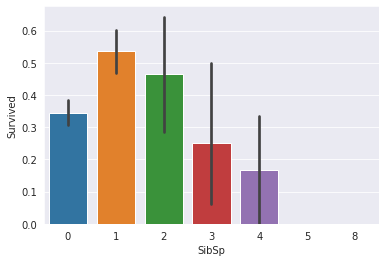

In [23]:
sns.barplot(y = "Survived", x = "SibSp", data = train_data)

In [24]:
#Unexpected but noted it seems like having siblings or spouses from 0-2 gave you a better chance of surviving
#Will try this out in model to check increase in accuracy

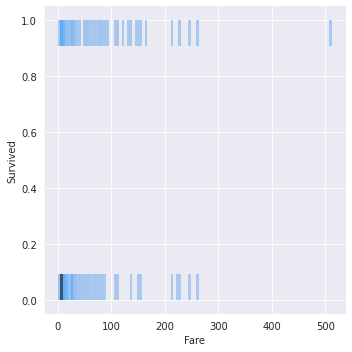

In [25]:
sns.displot(y = "Survived", x = "Fare", data = train_data)

In [26]:
#I tried various graphs for fare and it doesn't seem to be super important so won't use for model
# couldnt find clear correlation between survivability and fare

In [27]:
#Now we adjust the data to be the same type for our models
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Fare         891 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


# Starting to build models

In [28]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Fare         891 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [31]:
#below  we initialize our x and y for our models and the train_test_split

In [32]:
features = ['Pclass', 'Sex', 'SibSp']
x=train_data[features]
y= train_data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=5)

# Models are created below and compare through print statements 

In [34]:
#below are our models 

In [35]:
Linear = LinearRegression()
Linear.fit(x, y)
print(Linear.score(x, y))

0.37283122308998895


In [36]:
Neighbor = KNeighborsClassifier()
NeighborM = Neighbor.fit(x, y)
print(Neighbor.score(x, y))

0.7699214365881033


In [37]:
Class = SGDClassifier()
ClassM = Class.fit(x, y)
print(Class.score(x, y))

0.755331088664422


In [38]:
Tree = DecisionTreeClassifier()
Tree.fit(x, y)
print(Class.score(x, y))

0.755331088664422


# Best model is picked and submitted below

In [39]:
#our submission with our best model is below

In [40]:
X_test = test_data[features]
prediction = NeighborM.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
output.to_csv('submission.csv', index=False)